## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Read Data and Show it

In [2]:
data=pd.read_csv('Airline Dataset Updated.csv')

In [3]:
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


## Show Information of Data and its description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
data.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


## Data Cleansing

In [6]:
data.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Data Analysis and its Visualization

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2268\4244589935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=data[col],palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2268\4244589935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=data[col],palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2268\4244589935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=data[col],palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2268\4244589935.py:7: FutureWarning:

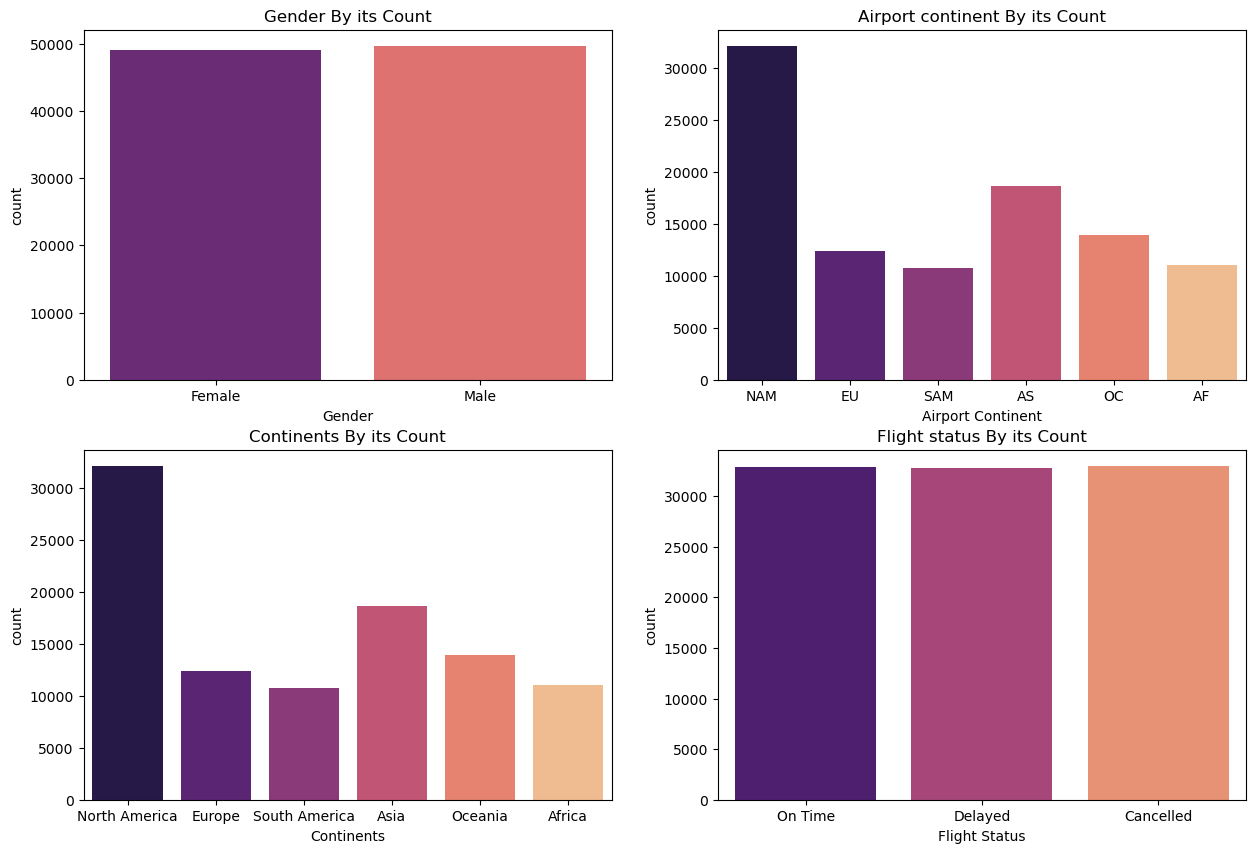

In [8]:
plt.figure(figsize=(15,10))
index=1
for col in data.columns:    
    if data[col].nunique()<=6:
        plt.subplot(2,2,index)
        plt.title(col.capitalize()+" By its Count")
        sns.countplot(data=data,x=data[col],palette='magma')
        index+=1
plt.show()        

## Data Preprocessing

In [9]:
for col in data.columns:
    print(col)
    print(data[col].nunique())

Passenger ID
98619
First Name
8437
Last Name
41658
Gender
2
Age
90
Nationality
240
Airport Name
9062
Airport Country Code
235
Country Name
235
Airport Continent
6
Continents
6
Departure Date
364
Arrival Airport
9024
Pilot Name
98610
Flight Status
3


In [10]:
def label_encoder(data):
    labels={}
    for col in data.columns:
        if data[col].dtype=='object':
            label=LabelEncoder()
            data[col]=label.fit_transform(data[col])
            labels[col]=label
    return data,labels   


In [11]:
data,labels=label_encoder(data)

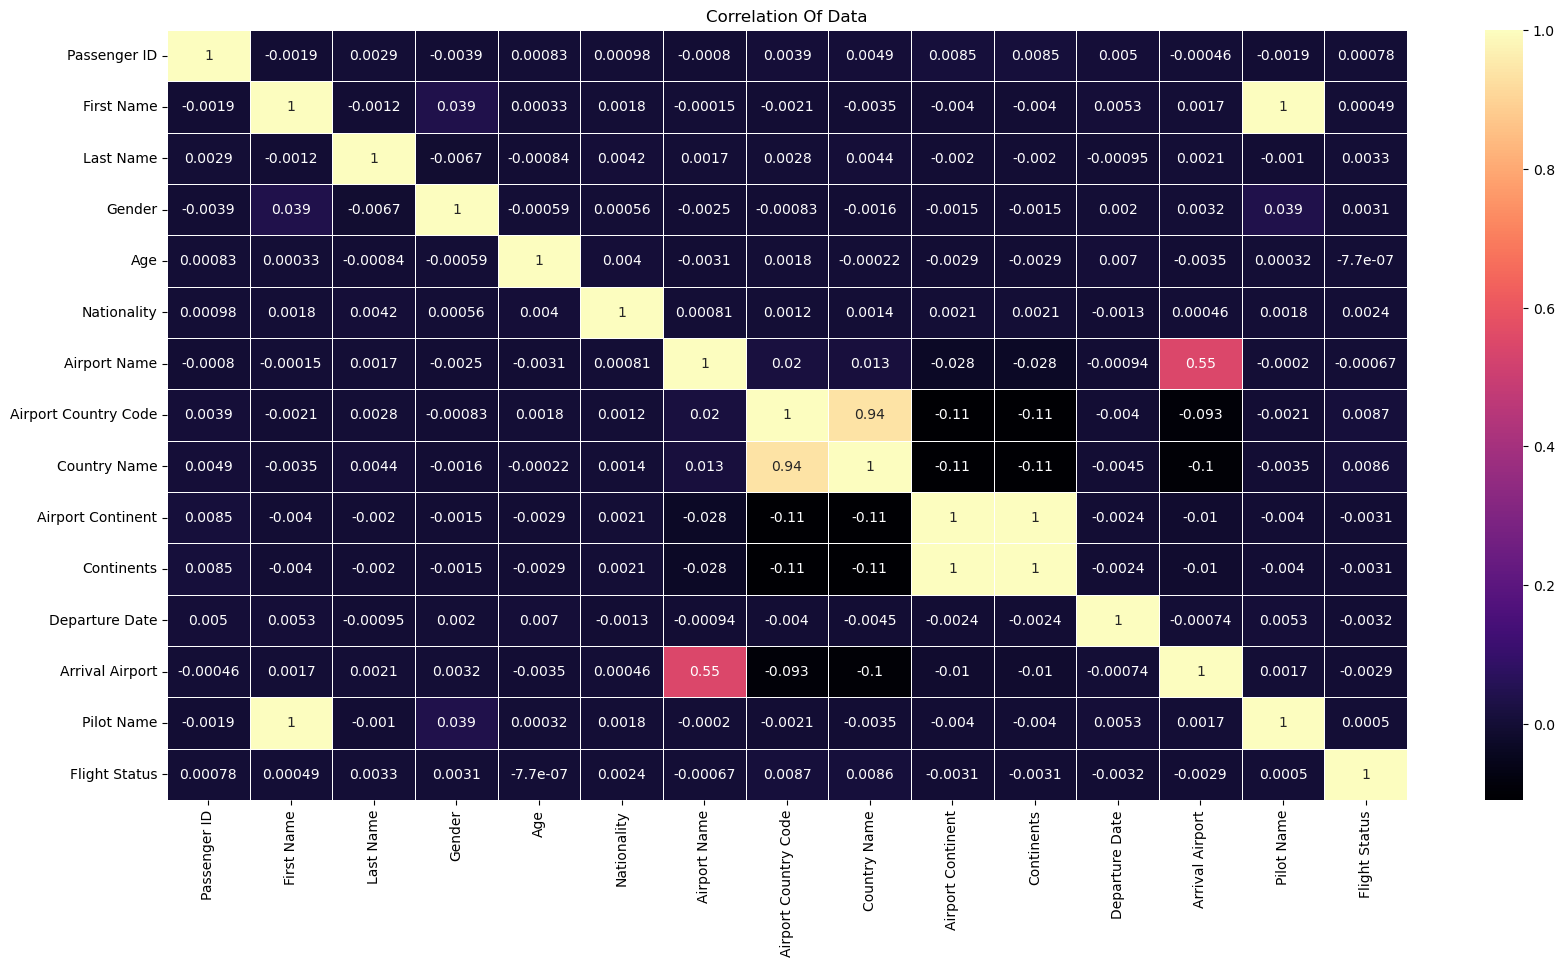

In [12]:
plt.figure(figsize=(20,10))
plt.title("Correlation Of Data")
sns.heatmap(data.corr(),cmap='magma',linecolor='white',linewidths=0.5,annot=True)
plt.show()

In [13]:
def remove_no_corr(data):
    
    for col in data.columns:
        if -0.003<data['Flight Status'].corr(data[col])<0.003:
            data.drop(col,axis=1,inplace=True)
    return data        

In [14]:
data=remove_no_corr(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Last Name             98619 non-null  int32
 1   Gender                98619 non-null  int32
 2   Airport Country Code  98619 non-null  int32
 3   Country Name          98619 non-null  int32
 4   Airport Continent     98619 non-null  int32
 5   Continents            98619 non-null  int32
 6   Departure Date        98619 non-null  int32
 7   Flight Status         98619 non-null  int32
dtypes: int32(8)
memory usage: 3.0 MB


## Data Splitting 

In [16]:
def splitting(data):
    test_rate=0.2
    no_test_records=int(0.2*len(data.index))
    no_train_records=len(data.index)-no_test_records
    return data.iloc[:no_train_records,:],data.iloc[no_train_records:,:]

In [17]:
x_train,x_test=splitting(data)

## Data Modeling and its Evaluations

KMeans Model

In [22]:
kmeans=KMeans(n_clusters=3,random_state=42)
predict_train=kmeans.fit_predict(x_train)
predict_test=kmeans.fit_predict(x_test)

In [23]:
train_score=silhouette_score(x_train,predict_train)
test_score=silhouette_score(x_test,predict_test)

In [24]:
print("Training Score : ",round(train_score,2))
print("Testing  Score : ",round(test_score,2))

Training Score :  0.59
Testing  Score :  0.59


Agglomerative Clustering Model

In [27]:
agglo_cluster=AgglomerativeClustering(n_clusters=3,linkage='single')
predict_train2=agglo_cluster.fit_predict(x_train)
predict_test2=agglo_cluster.fit_predict(x_test)

In [28]:
train_score2=silhouette_score(x_train,predict_train2)
test_score2=silhouette_score(x_test,predict_test2)

In [29]:
print("Training Score : ",round(train_score2,2))
print("Testing  Score : ",round(test_score2,2))

Training Score :  0.0
Testing  Score :  -0.58


DBSCAN Model

In [46]:
dbscan=DBSCAN(eps=1.5,min_samples=2,algorithm='auto')
predict_train3=dbscan.fit_predict(x_train)
predict_test3=dbscan.fit_predict(x_test)

In [47]:
train_score3=silhouette_score(x_train,predict_train3)
test_score3=silhouette_score(x_test,predict_test3)

In [48]:
print("Training Score : ",round(train_score3,2))
print("Testing  Score : ",round(test_score3,2))

Training Score :  -0.96
Testing  Score :  -0.61


## Saving Models

In [49]:
pickle.dump(kmeans,open(r'models\Kmeans_model.pkl','wb'))
pickle.dump(agglo_cluster,open(r'models\Agglomerative_model.pkl','wb'))
pickle.dump(dbscan,open(r'models\DBSCAN_model.pkl','wb'))

## Loading Models

In [50]:
def load_models():
    kmeans=pickle.load(open(r'models\Kmeans_model.pkl','rb'))
    agglo_cluster=pickle.load(open(r'models\Agglomerative_model.pkl','rb'))
    dbscan=pickle.load(open(r'models\DBSCAN_model.pkl','rb'))
    return kmeans,agglo_cluster,dbscan

In [51]:
kmeans,agglo_cluster,dbscan=load_models()

## Saving Label Encoders

In [52]:
pickle.dump(labels,open(r'labels\Label_Encoders.pkl','wb'))

## Loading Label Encoders

In [53]:
def load_labels():
    labels=pickle.load(open(r'labels\Label_Encoders.pkl','rb'))
    return labels

In [54]:
labels=load_labels()